In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
# df=pd.read_csv('/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv')
df=pd.read_csv('./Cleaned-Data.csv')

In [6]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [7]:
del df['Country']

In [8]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.drop_duplicates()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31675,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
31676,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
31677,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
31678,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


# Exploratory data analysis

Heatmap

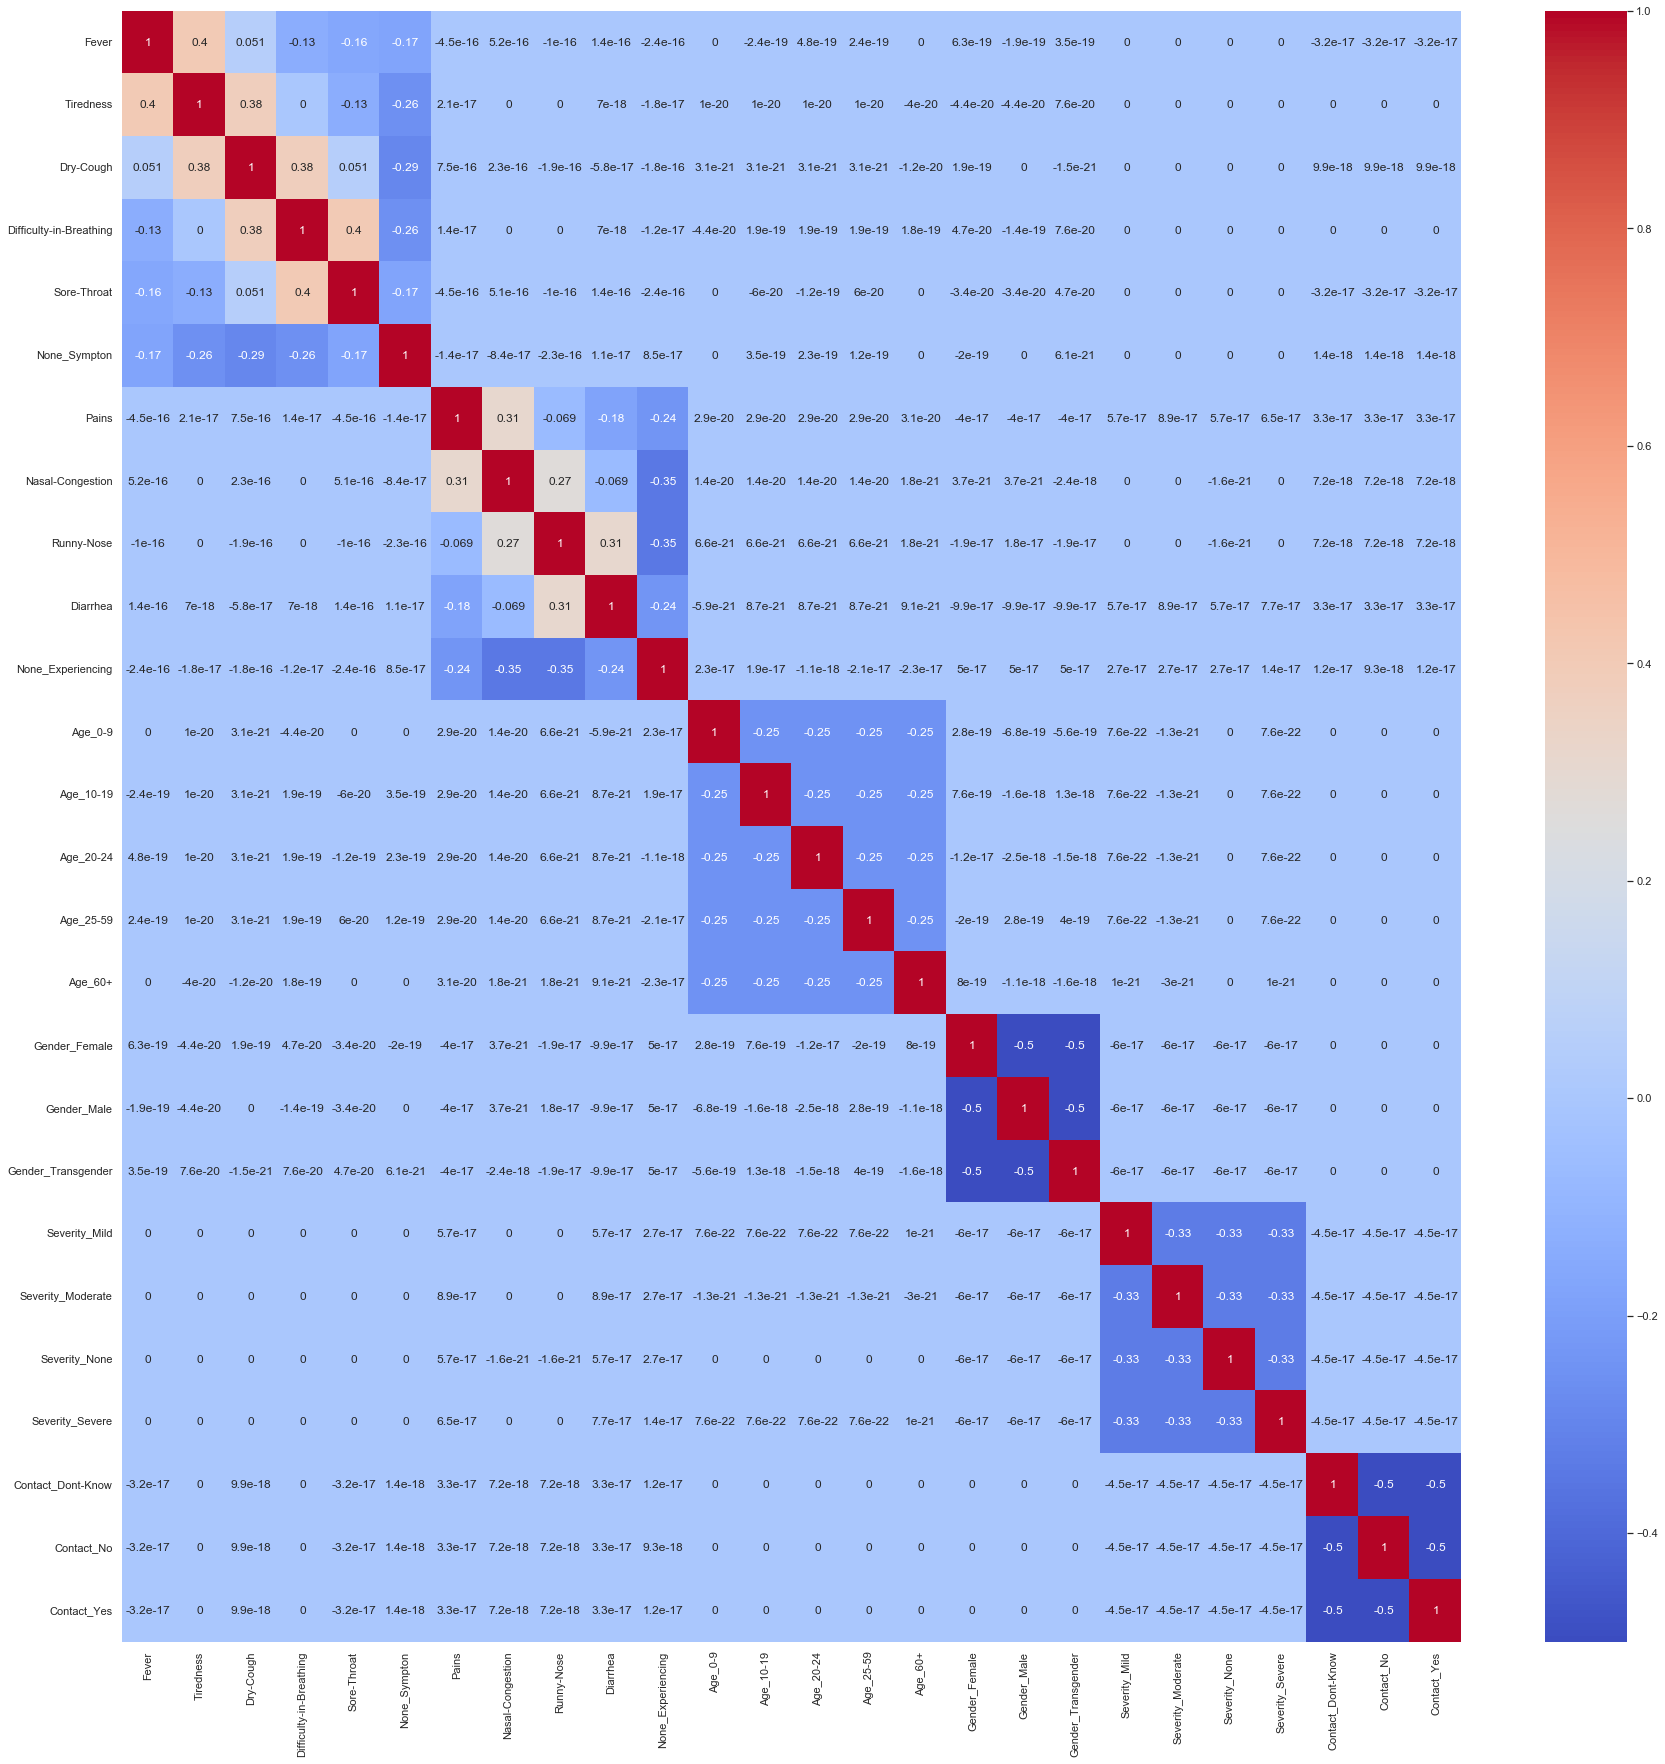

In [13]:
figure = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D61DC19E80>,
      dtype=object)

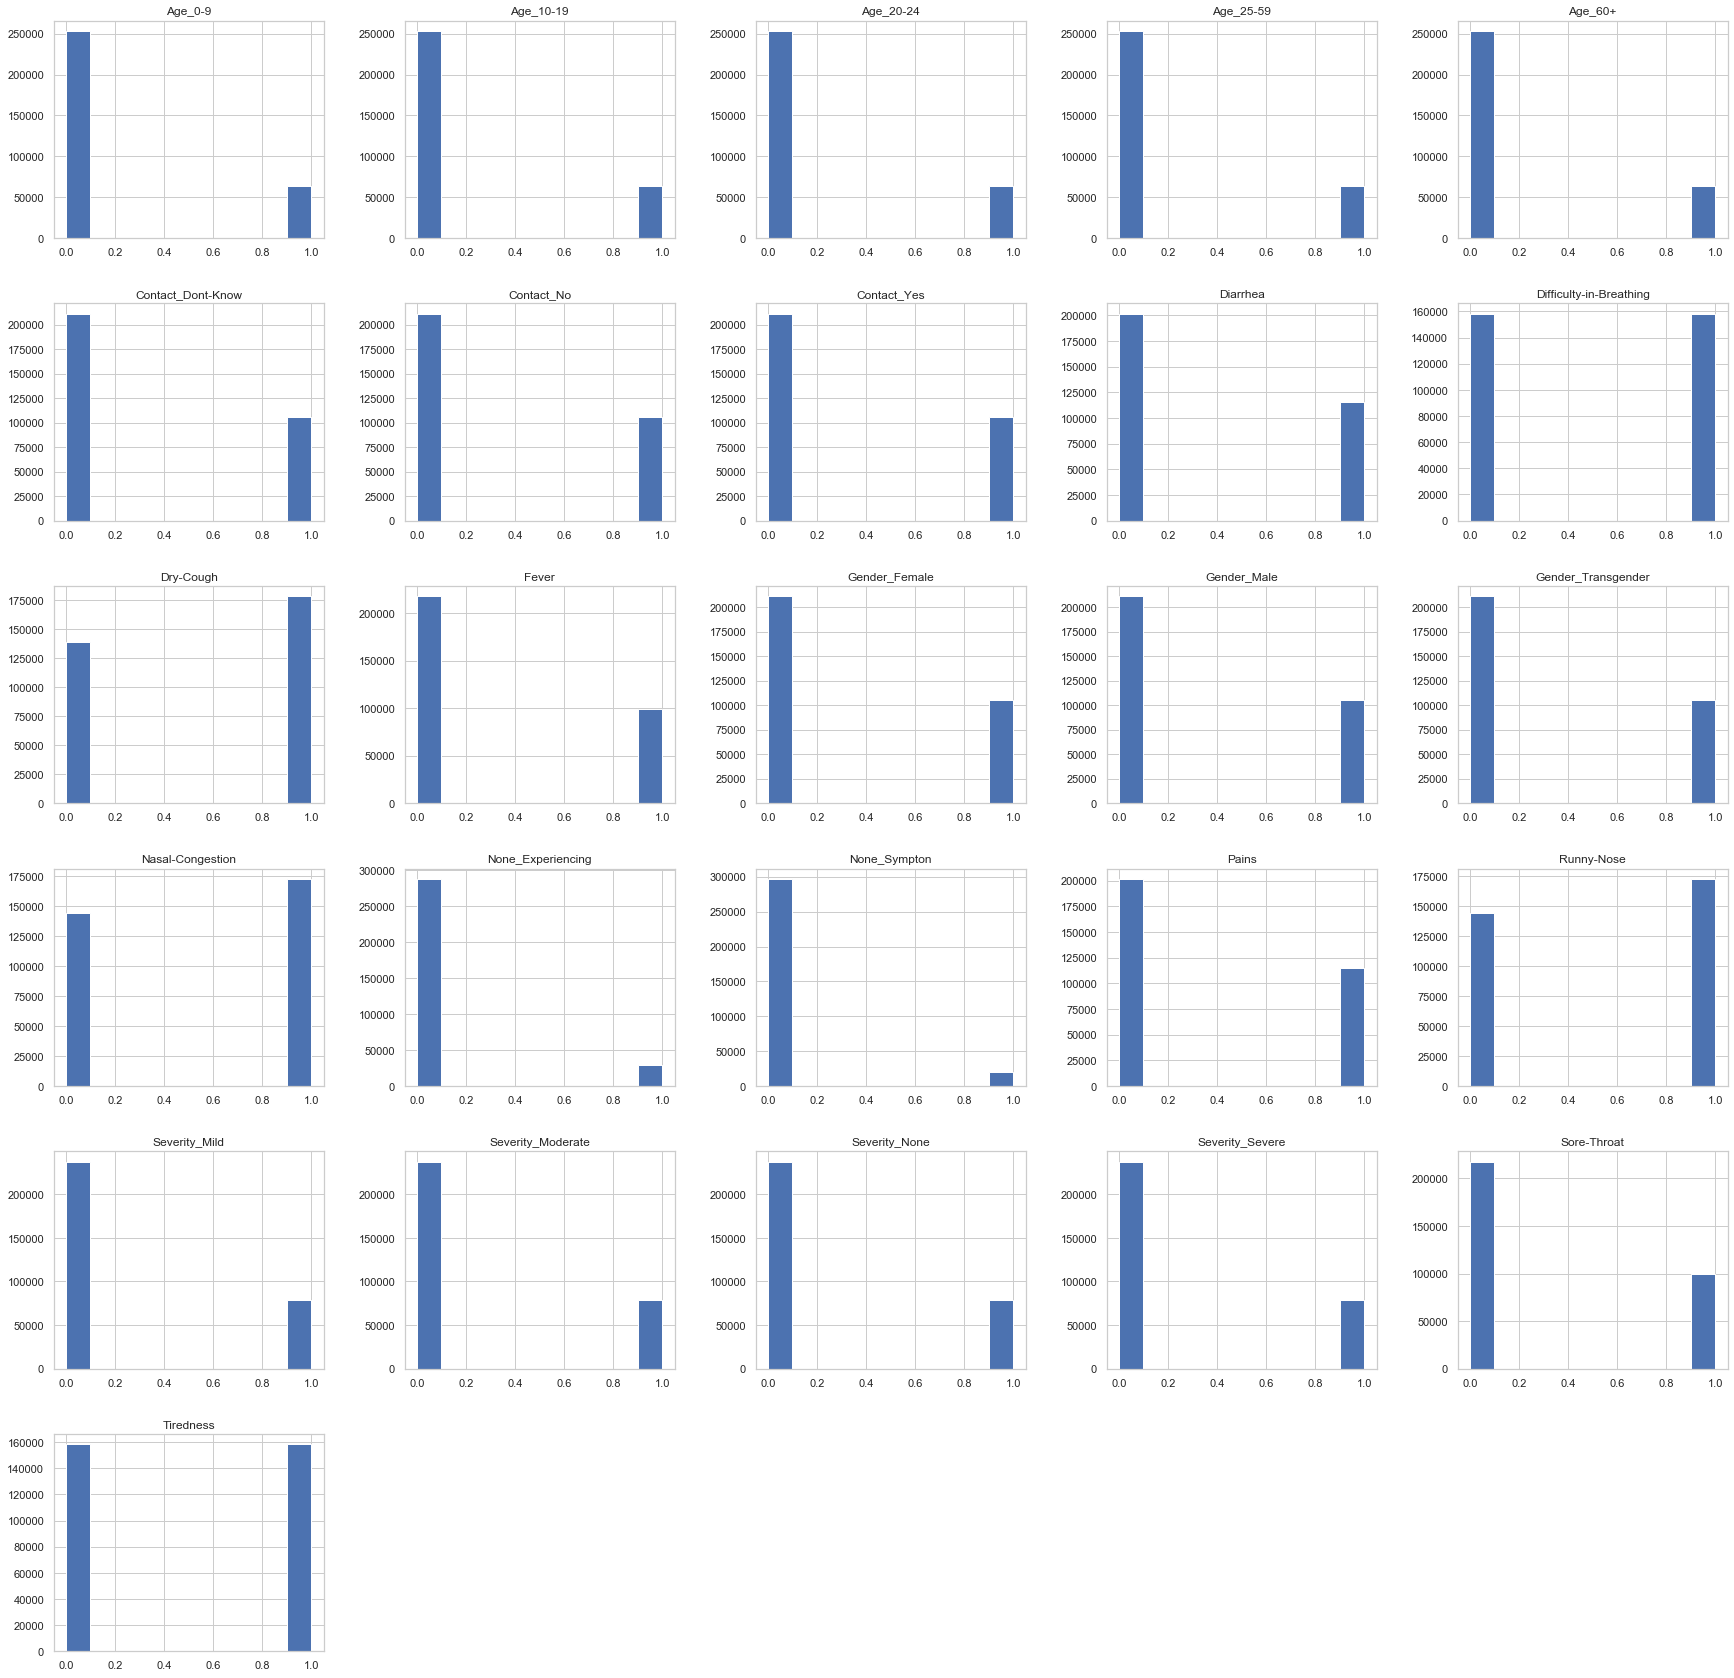

In [15]:
df.hist(figsize=(30,30))

# Preparing data for analysis

In [16]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes'],
      dtype='object')

In [17]:
train_df=df.copy()
        

In [18]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
train_df_scaled=scaler.fit_transform(train_df)

# Elbow method

In [19]:
inertias = []

for i in range(1,15):
    km=KMeans(n_clusters=i, random_state=2)
    km.fit(train_df_scaled)
    inertias.append(km.inertia_)

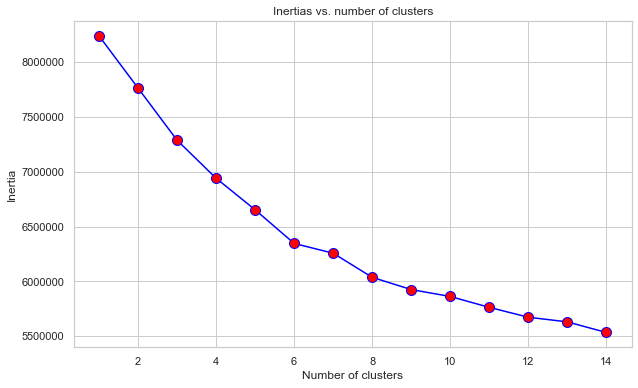

In [20]:


plt.figure(figsize=(10,6))
plt.plot(range(1,15), inertias, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertias vs. number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



Based on the plot above, I would choose as number of clusters number between 6-8 - I will additionally check Davies Bouldin Score.

In [21]:
from sklearn.metrics import davies_bouldin_score

In [22]:
bouldin_score=[]

for i in range(4,15):
    km=KMeans(n_clusters=i, random_state=2)
    labels=km.fit_predict(train_df_scaled)
    bouldin_score.append(davies_bouldin_score(train_df_scaled, labels))



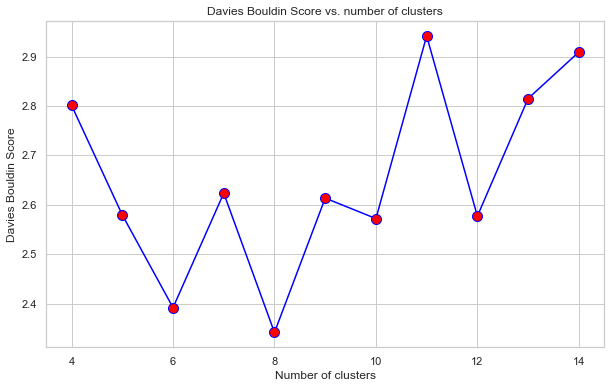

In [23]:

plt.figure(figsize=(10,6))
plt.plot(range(4,15), bouldin_score, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Davies Bouldin Score vs. number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

In Davies Bouldin score we are looking for minimum value, and since minimum value is for 7 clusters, I will use 7 as n_clusters.

# Model - KMeans

In [24]:
km_model=KMeans(n_clusters=7, random_state=2)
km_model.fit(train_df_scaled)

KMeans(n_clusters=7, random_state=2)

In [25]:
labels=km_model.labels_

In [26]:
corona_df=pd.DataFrame(km_model.cluster_centers_, columns=train_df.columns)

In [27]:
corona_df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.148470e-16,-1.794286e-16,4.067136e-16,5.382876e-17,...,-4.716712e-15,8.450321e-15,8.382670e-15,-3.948394e-20,-7.008984e-22,-7.398356e-17,-1.191527e-20,7.401487e-17,7.401487e-17,7.401487e-17
1,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.304126e-16,-3.218960e-16,4.300096e-16,5.369232e-17,...,1.329361e-15,-2.159075e-16,2.135820e-16,-1.366752e-19,-4.555839e-20,-7.392375e-17,-4.555839e-20,7.401487e-17,7.401487e-17,7.401487e-17
2,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.305621e-16,-3.226137e-16,4.304282e-16,5.378203e-17,...,-4.716233e-15,7.877342e-15,7.875362e-15,-4.696019e-20,-1.565340e-20,-7.398356e-17,-1.565340e-20,7.401487e-17,7.401487e-17,7.401487e-17
3,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,-3.417651e-17,1.616678e-16,1.783590e-16,-8.564277e-18,...,2.117417e-15,-1.369756e-14,-1.357525e-14,-4.696019e-20,-4.555839e-20,-1.850232e-17,-4.555839e-20,-7.071068e-01,-7.071068e-01,1.414214e+00
4,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.305621e-16,-3.226137e-16,4.304282e-16,5.378203e-17,...,-4.716233e-15,7.877342e-15,7.875362e-15,-4.696019e-20,-1.565340e-20,-7.398356e-17,-1.565340e-20,7.401487e-17,7.401487e-17,7.401487e-17
5,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.305621e-16,-3.226137e-16,4.304282e-16,5.378203e-17,...,-4.716233e-15,7.877342e-15,7.875362e-15,-4.696019e-20,-1.565340e-20,-7.398356e-17,-1.565340e-20,7.401487e-17,7.401487e-17,7.401487e-17
6,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,8.918161e-17,1.206681e-16,3.051263e-16,-2.369807e-17,...,8.551059e-15,6.938325e-15,8.645356e-15,2.032605e-20,-7.008984e-22,-1.850232e-17,-2.312965e-20,3.535534e-01,3.535534e-01,-7.071068e-01


Looks that people from 6th cluster are not affected by covid, unlike other clusters.

# PCA

In [28]:
covid_pca=PCA(n_components=3)
principal_comp=covid_pca.fit_transform(train_df_scaled)

In [29]:
principal_comp=pd.DataFrame(principal_comp,columns=['pca1','pca2','pca3'])
principal_comp

,pca1,pca2,pca3
0,-2.592418,-1.452290,-0.344339
1,-2.673729,-1.464117,-0.448419
2,-2.587224,-1.529502,-0.273011
3,-2.256286,-1.668557,-0.071799
4,-2.337597,-1.680384,-0.175880
...,...,...,...
316795,4.072854,3.151445,0.217593
316796,4.159359,3.086061,0.393002
316797,4.007136,3.223292,0.167548
316798,3.925825,3.211465,0.063468


In [30]:
principal_comp1=pd.concat([principal_comp,pd.DataFrame({"Cluster":labels})],axis=1)


In [31]:
principal_comp1.sample(10)

,pca1,pca2,pca3,Cluster
77068,-0.286738,0.793620,0.728771,6
226642,1.036610,3.413224,0.838379,0
69165,0.604405,3.488924,-0.241575,0
203769,-0.442013,-0.075471,0.650460,3
251224,3.789308,-0.476049,0.337127,1
20369,-0.045373,0.702305,-1.047281,4
46759,-1.036696,-0.044223,1.891364,6
57895,-1.037229,0.426039,-0.171434,2
138884,0.409187,-1.478740,-1.863397,5
2065,3.276288,-0.198855,-0.232318,1


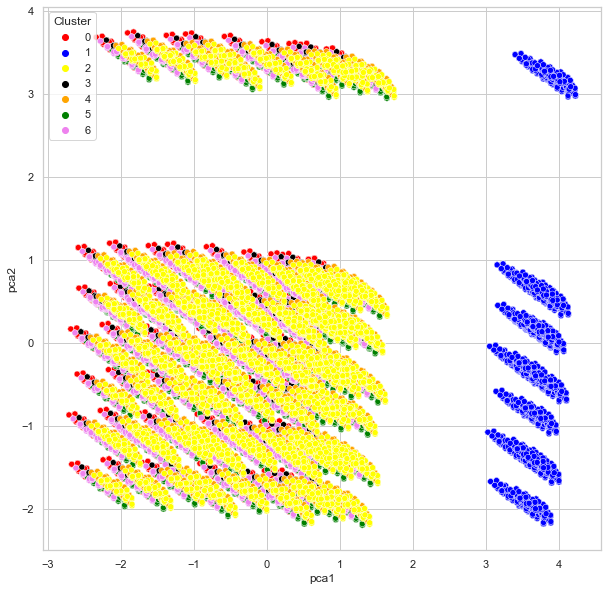

In [32]:
#Plotting the 2d-plot.
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue="Cluster",data=principal_comp1, palette=['red', 'blue', 'yellow', 'black', 'orange', 'green', 'violet'])
plt.show()



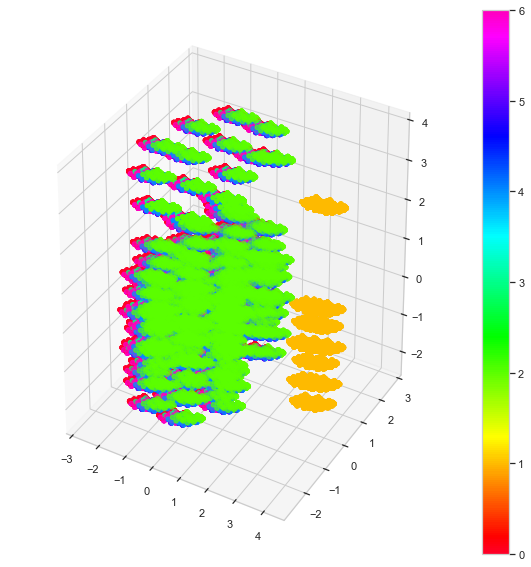

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=principal_comp1['pca1'],ys=principal_comp1['pca3'],zs=principal_comp1['pca2'],c=principal_comp1['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()